## Respuestas Miniproyecto 2 - Darwin Joan Pérez Avendaño.

Utiliza este cuaderno como base para implementar las visualizaciones.

In [2]:
#Importación de paquetes.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Caso Uno

In [3]:
df_videoconferencia = pd.read_csv('/Users/darwi/Downloads/videoconferencia.csv')
df_videoconferencia

,Semana,Día,Horas
0,Semana 01,Lunes,1873263
1,Semana 01,Martes,908249
2,Semana 01,Miércoles,1717158
3,Semana 01,Jueves,1873263
4,Semana 01,Viernes,908249
...,...,...,...
79,Semana 12,Miércoles,8592037
80,Semana 12,Jueves,8592037
81,Semana 12,Viernes,8592037
82,Semana 12,Sábado,4686565


In [5]:
df_1 = df_videoconferencia.groupby(['Día','Semana'],sort=False).agg(['mean'])
df_1.columns = df_1.columns.droplevel(0)
df_1.reset_index(inplace = True)
df_1.head()

,Día,Semana,mean
0,Lunes,Semana 01,1873263
1,Martes,Semana 01,908249
2,Miércoles,Semana 01,1717158
3,Jueves,Semana 01,1873263
4,Viernes,Semana 01,908249


In [6]:
# pivoteo de las tablas y creación de index para los días de la semana.
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df_pivot = pd.pivot_table(df_1[['Semana','Día','mean']],
                          values = 'mean', 
                          index = ['Día'], 
                          columns = 'Semana').reindex(dias)

heatmap_data = df_pivot 
heatmap_data2 = df_pivot

### HeatMap Color Secuencial.

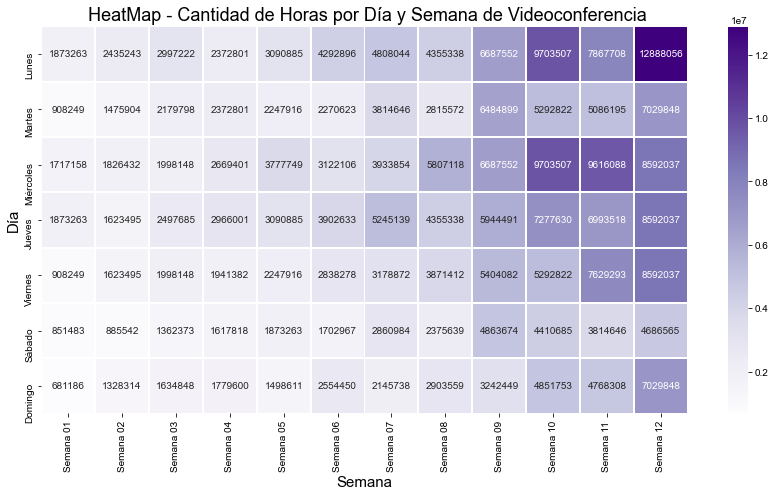

In [7]:
fig, ax = plt.subplots(figsize=(12,7))         
sns.heatmap(heatmap_data,
            cmap = "Purples",
            annot = True,
            linewidths = .8,
            ax = ax,
            xticklabels = True,
            yticklabels = True,
            fmt = "d")
sns.set(font_scale = .8)
plt.ylabel("Día", size = 15)
plt.xlabel("Semana", size = 15)
plt.title(" HeatMap - Cantidad de Horas por Día y Semana de Videoconferencia", size = 18)

plt.tight_layout()

### HeatMap Color Divergente.

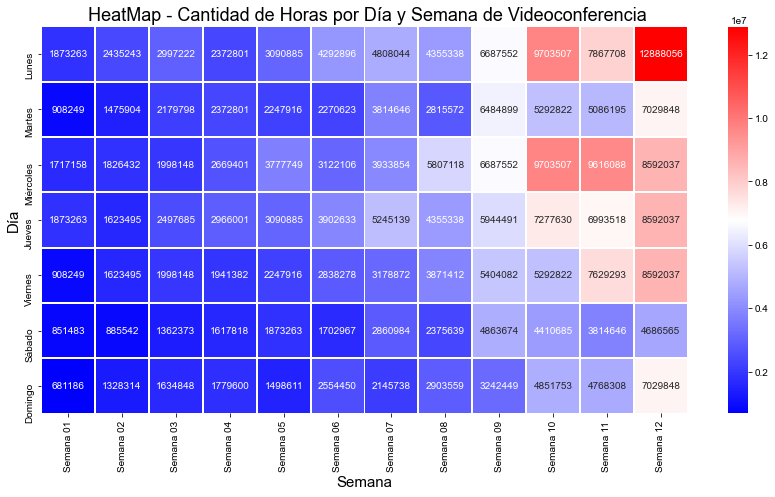

In [8]:
fig, ax = plt.subplots(figsize=(12,7))         
sns.heatmap(heatmap_data2,
            cmap = "bwr",
            annot = True,
            linewidths = .8,
            ax = ax,
            xticklabels = True,
            yticklabels = True,
            fmt = "d")
sns.set(font_scale = .8)
plt.ylabel("Día", size = 15)
plt.xlabel("Semana", size = 15)
plt.title(" HeatMap - Cantidad de Horas por Día y Semana de Videoconferencia", size = 18)

plt.tight_layout()

### ¿Cuál paleta es más efectiva para codificar estos datos?

**R.-** La paleta mas efectiva es una ***Secuencial***, debido que este tipo de paletas son más apropiadas cuando existe un orden o gradación en los datos como se puede ver en las horas totales de realizar una videoconferencia en comparación con una paleta ***Divergente*** que se usan en escenarios en los que hay un orden entre los valores pero hay también un "centro" definido, por ejemplo las alturas con respecto al nivel del mar (que pueden ser positivas, negativas o cero).

## Caso 2



In [8]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# Agrupación de la variable class
class_distribucion = df_titanic.groupby("class").size()
print()

class_distribucion = class_distribucion / class_distribucion.sum()
print(class_distribucion*100)


class
First     24.242424
Second    20.650954
Third     55.106622
dtype: float64


## Caso 2.1

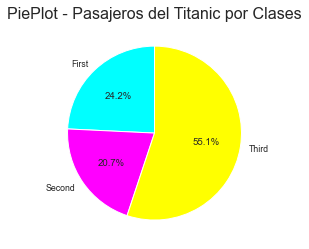

In [11]:
etiquet = ['First', 'Second', 'Third']
colors = ["cyan", "magenta", "yellow"]

pie_chart = plt.pie(class_distribucion, 
                   autopct = '%1.1f%%',
                    labels = etiquet,
                    colors= colors,
                    startangle = 90)

plt.title('PiePlot - Pasajeros del Titanic por Clases', size = 16)

plt.show()

## Caso 2.2

In [13]:
dual = df_titanic[['survived','class']]
survived = dual[dual['survived'] == 1]
not_survived = dual[dual['survived'] == 0]

# Agrupación de datos, de gente que no sobrevivio.
class_distribucion0 = not_survived.groupby("class").size()

class_distribucion0 = class_distribucion0 / class_distribucion0.sum()
print(class_distribucion0*100)

print()

# Agrupación de datos, gente que sobrevivio.
class_distribucion1 = survived.groupby("class").size()

class_distribucion1 = class_distribucion1 / class_distribucion1.sum()
print(class_distribucion1*100)

class
First     14.571949
Second    17.668488
Third     67.759563
dtype: float64

class
First     39.766082
Second    25.438596
Third     34.795322
dtype: float64


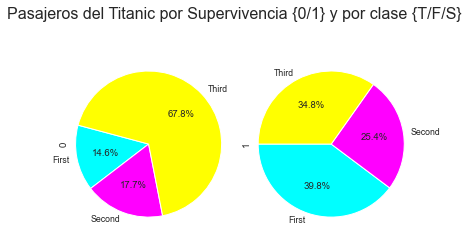

In [14]:
fig1, (ax0, ax1) = plt.subplots(1, 2)

#Gráficos Dual.
fig1.suptitle('Pasajeros del Titanic por Supervivencia {0/1} y por clase {T/F/S}', size = 16)

ax0.pie(class_distribucion0,
        labels = etiquet, 
        autopct = '%1.1f%%',
        radius = 1.2,
        colors = colors,
        startangle = 165)
ax0.set_ylabel('0')

ax1.pie(class_distribucion1,
        labels = etiquet, 
        autopct = '%1.1f%%',
        radius = 1.2,
        colors = colors,
        startangle = 180)
ax1.set_ylabel('1')

plt.show()

### Indique: 


*A) De los supervivientes, ¿Cuál es la clase de pasajero más común?*


***R.-*** La clase más común de las personas que sobrevivieron son de ***Primera clase***.
 
 
 
*B) De los no supervivientes, ¿Cuál es la clase de pasajero más común?* 


***R.-*** La clase más común de las personas que no sobrevivieron son de ***Tercera clase***.
 
 
 
*C) ¿Cree que este gráfico es más efectivo que un gráfico de barras para comparar categorías?*

***R.-*** Los gráficos Pie-Plot en este caso son más efectivo que un gráfico de barras, porque el número de categorias
es pequeño (el número de rebanadas es relativamente pequeño), se puede vizualizar y diferenciar claramente las proporciones (hay pocas proporciones) como la suma total del 100%. Se pueden utilizar gráficos de barras cuando se tiene muchas categorias pero no demasiadas pero tiene la desventaja de ser dificil ver la proporción, que es la parte del todo.

***Por lo cual los Pie-Plots son mas efectivos para este caso que los Bar-Plots.***

## Caso 3

In [15]:
df_peliculas = pd.read_csv('/Users/darwi/Downloads/peliculas.csv')
df_peliculas

,género,año,cantidad
0,acción,2010,11
1,acción,2011,14
2,acción,2012,22
3,acción,2013,11
4,acción,2014,12
...,...,...,...
125,mundo mágico,2015,29
126,mundo mágico,2016,30
127,mundo mágico,2017,11
128,mundo mágico,2018,22


## Caso 3.1.

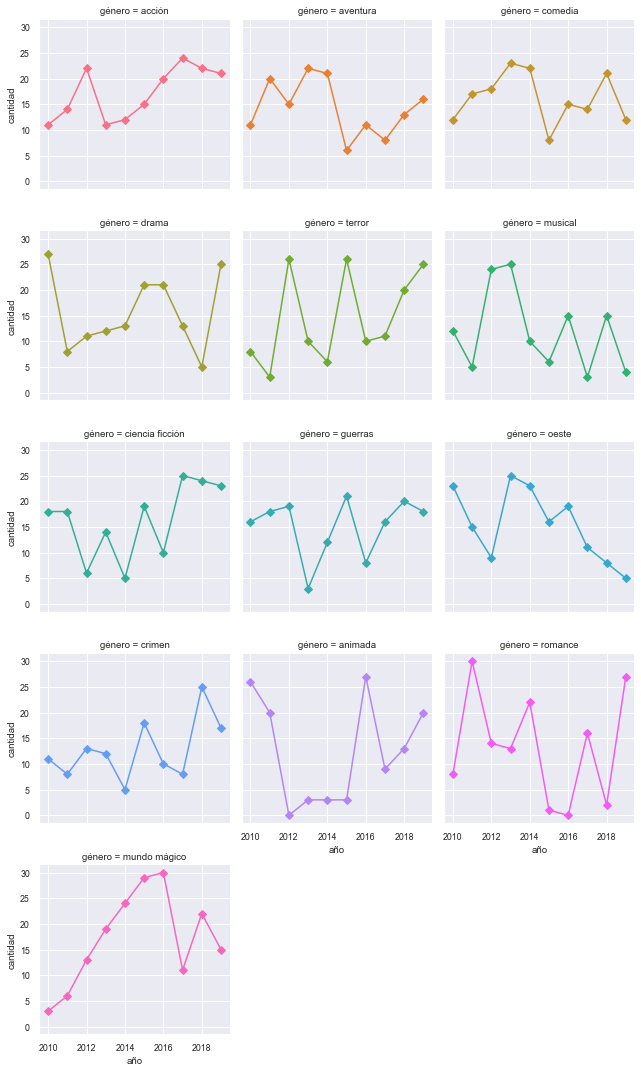

In [16]:
small_multiple1 = sns.FacetGrid(data = df_peliculas, 
                    col = "género", 
                    hue = "género", 
                    col_wrap = 3)

small_multiple1.map(plt.plot, "año", "cantidad", marker="D")

plt.show()

## Caso 3.2.

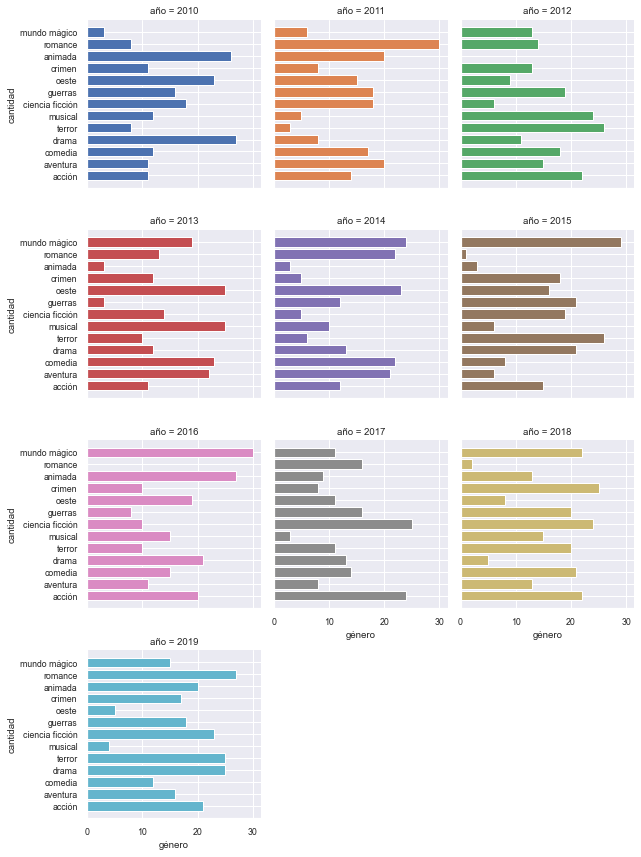

In [17]:
small_multiple2 = sns.FacetGrid(data =  df_peliculas, 
                                col = "año",
                                hue = "año", 
                                col_wrap = 3)

small_multiple2.map(plt.barh,"género","cantidad")

plt.show()

#### A) ¿Cuál de los dos gráficos permite comparar la tendencia de un género entre los diferentes años? 

***R.-*** El small multiple de lineas (**plt.plot**), es la visualización más adecuada para comparar tendencias anuales.

#### B) ¿Cual de los dos gráficos permite identificar el género de películas más estrenados en 1 año específico?

***R.-*** El small multiple de barras horizontales (**plt.barh**), es la visualización más adecuada para identificar el género de pelicula más predominante por año.